# Poisson processes
___
A Poisson process with parameter $\lambda > 0$ is a stochastic process $N(t)$ satisfying the following properties:
1. $N(0) = 0 \, \, a.s.$
1. For any $0 \le s < t$, $B(t) - B(s)$ is a Poisson random variable with parameter $\lambda(t-s)$, i.e., $$ P(N(t)-N(s) = k) = \frac{\lambda(t-s)^k}{k!} e^{-\lambda(t-s)}. $$ 
1. $N(t)$ has independent increments.
1.  Almost all sample paths of $N(t)$ is right continuous functions with left-hand limits.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
# time interval must be far smaller than 1 
# because the jump interval is always 1.
def poisson_process(step, lam=1, time_interval=1e-3):
    param = np.random.poisson(size=step, lam=lam*time_interval)
    coord = np.cumsum(param)
    return coord

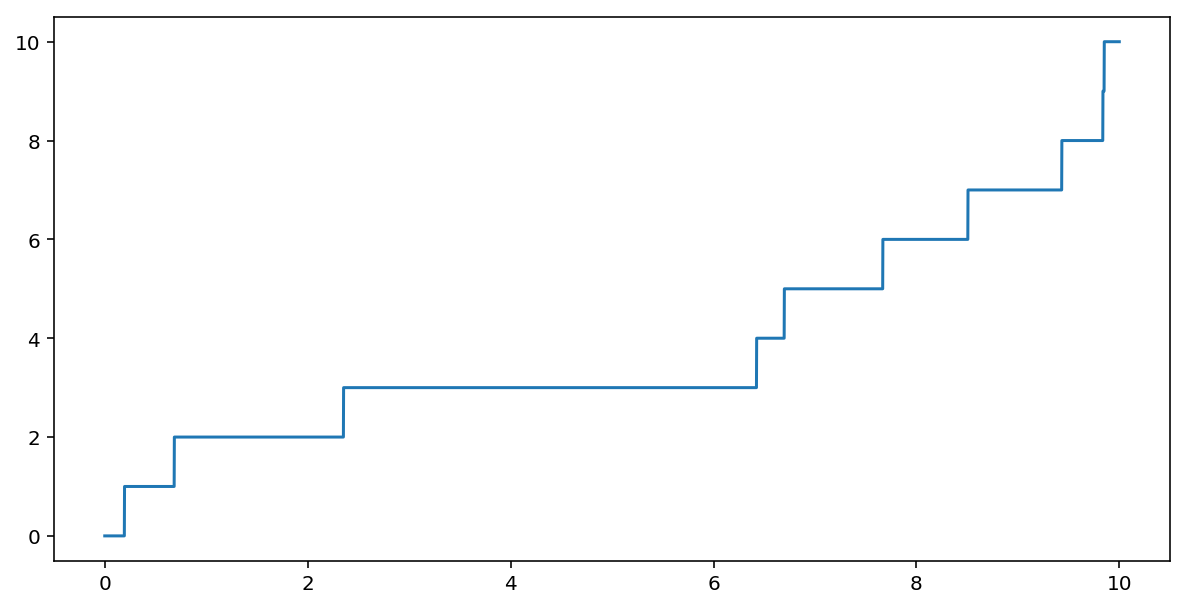

In [3]:
step = 10000
lam = 1
time_interval = 1e-3

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

t = np.arange(0, step * time_interval, time_interval)
x = poisson_process(step, lam, time_interval)
ax.plot(t, x)
plt.show()

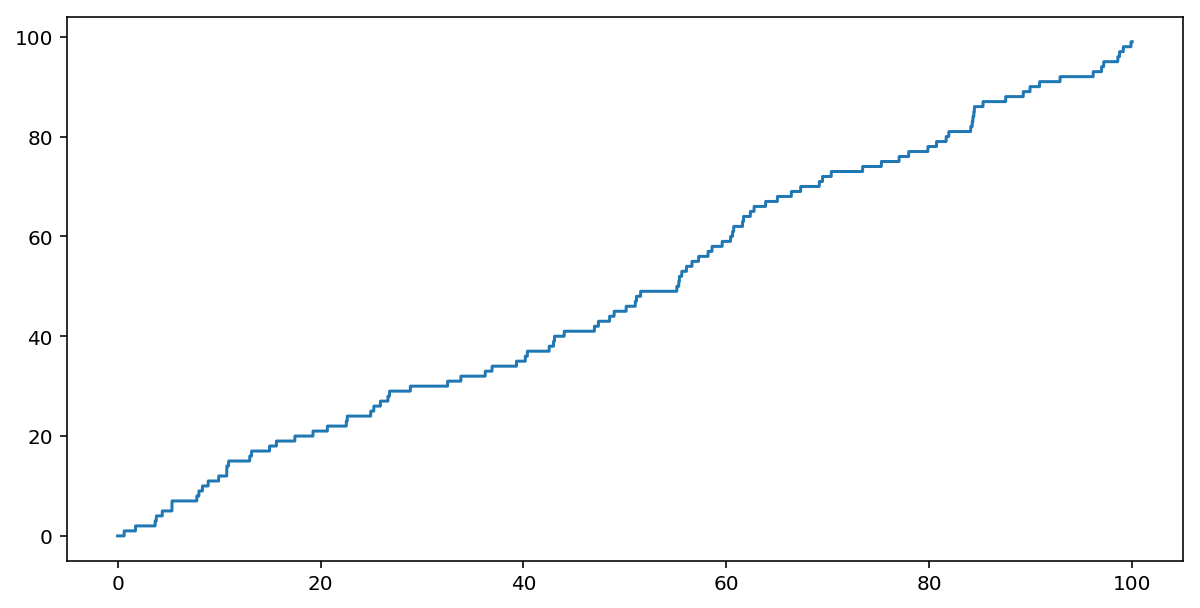

In [4]:
step = 100000
lam = 1
time_interval = 1e-3

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

t = np.arange(0, step * time_interval, time_interval)
x = poisson_process(step, lam, time_interval)
ax.plot(t, x)
plt.show()

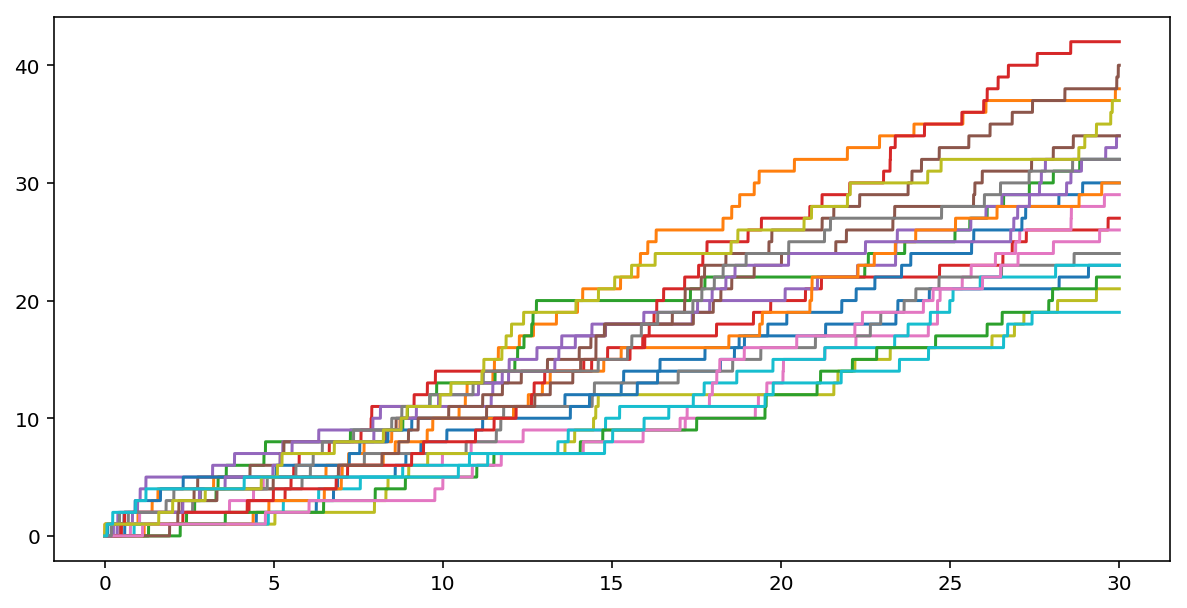

In [5]:
step = 30000
time_interval = 1e-3
num = 20

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
for i in range(num):   
    t = np.arange(0, step * time_interval, time_interval)
    x = poisson_process(step)
    ax.plot(t, x)
plt.show()

### change parameters (lambda)

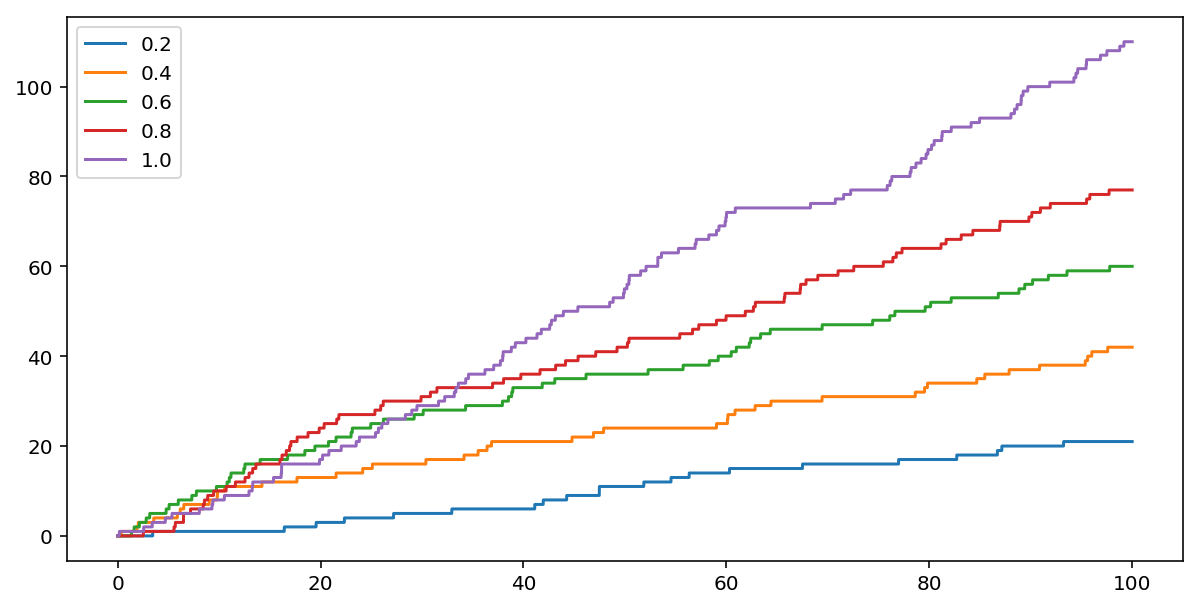

In [6]:
step = 100000
time_interval = 1e-3
lams = np.arange(0.2, 1.05, 0.2).round(2)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
for lam in lams:   
    t = np.arange(0, step * time_interval, time_interval)
    x = poisson_process(step, lam, time_interval)
    ax.plot(t, x, label=lam)
ax.legend()
plt.show()

# Compensated Poisson processes
___
A comlensated Poisson process is a stochastic process:
$$ N(t) - \lambda t,$$
where $N(t)$ is a Poisson process.

A compensated Poisson process is a martingale.

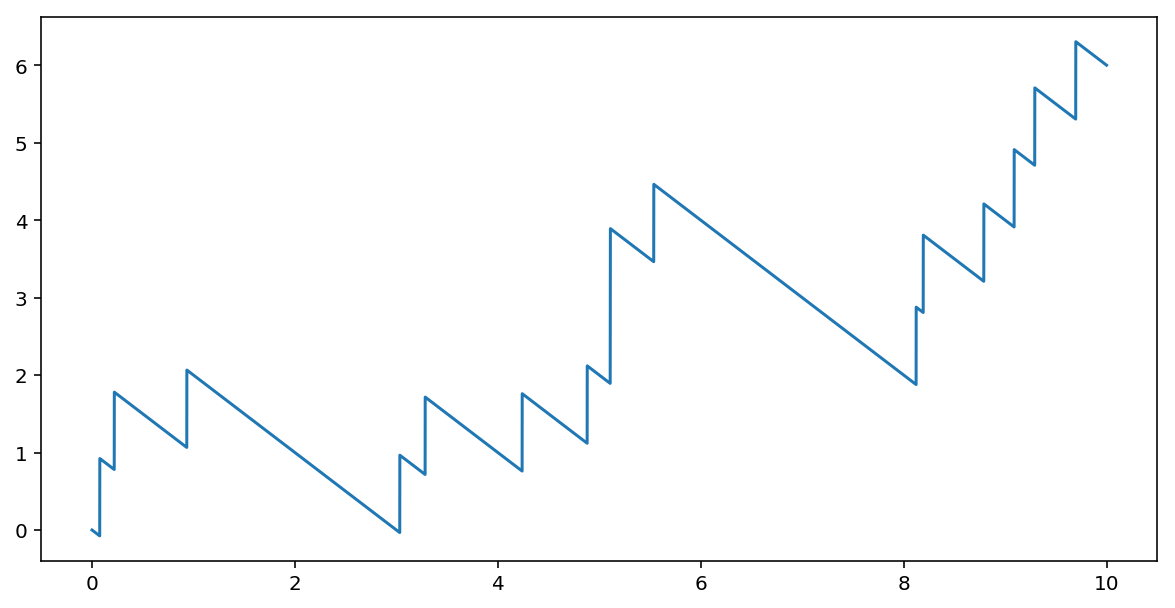

In [7]:
step = 10000
lam = 1
time_interval = 1e-3

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

t = np.arange(0, step * time_interval, time_interval)
x = poisson_process(step, lam, time_interval)
x = x.astype(np.float64) - lam * t
ax.plot(t, x)
plt.show()

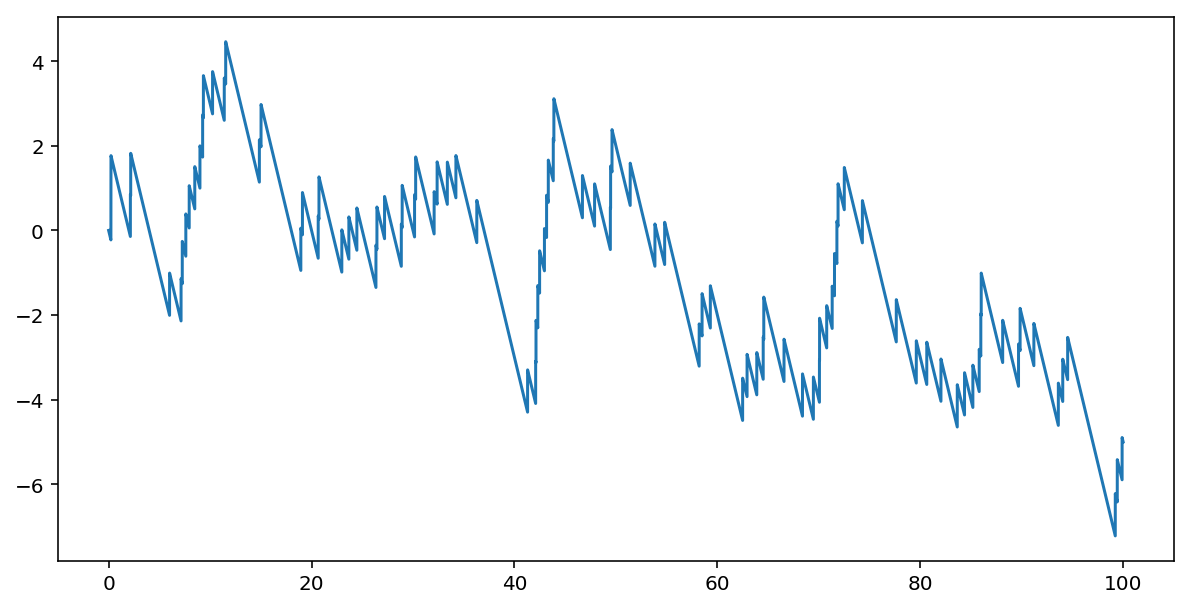

In [8]:
step = 100000
lam = 1
time_interval = 1e-3

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

t = np.arange(0, step * time_interval, time_interval)
x = poisson_process(step, lam, time_interval)
x = x.astype(np.float64) - lam * t
ax.plot(t, x)
plt.show()

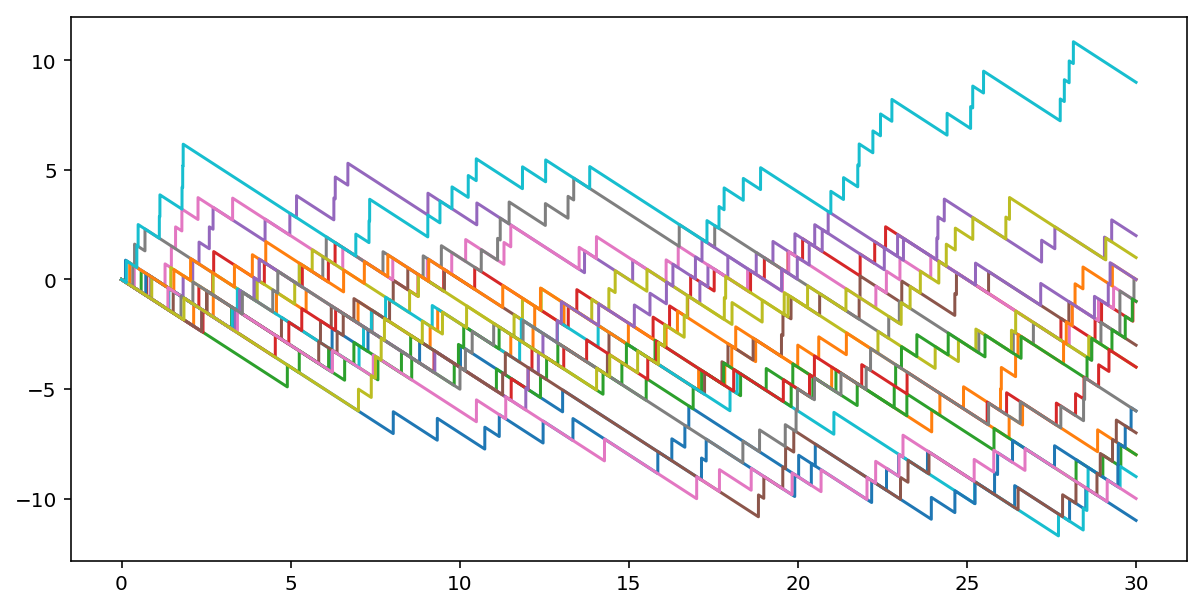

In [9]:
step = 30000
lam = 1
time_interval = 1e-3
num = 20

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
for i in range(num):   
    t = np.arange(0, step * time_interval, time_interval)
    x = poisson_process(step, lam, time_interval)
    x = x.astype(np.float64) - lam * t
    ax.plot(t, x)
plt.show()

### change parameters (lambda)

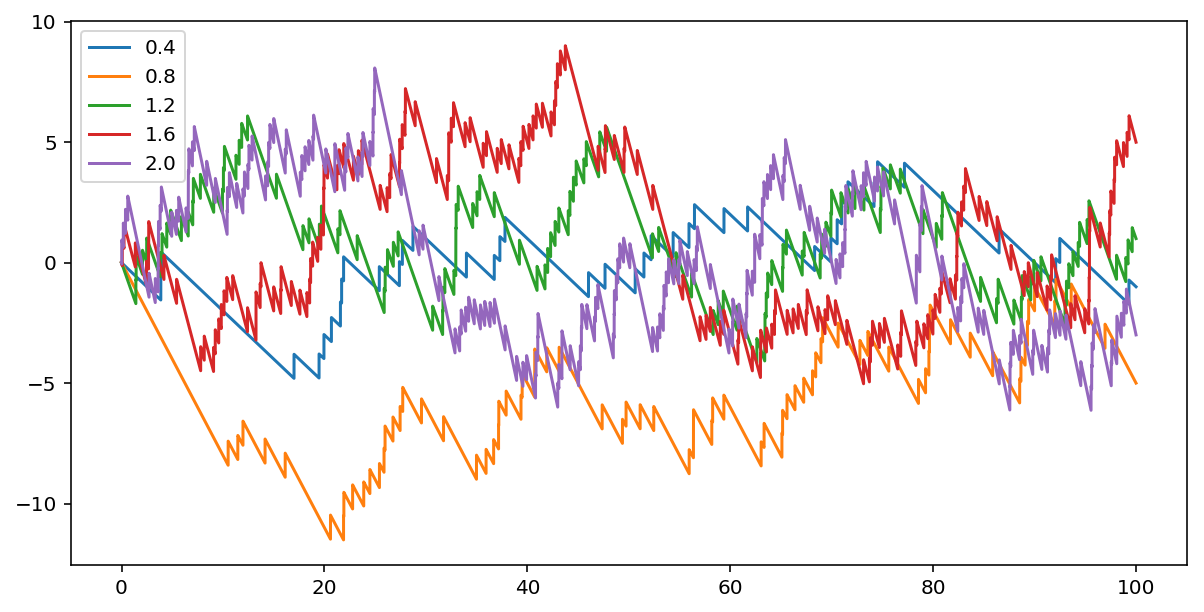

In [10]:
step = 100000
time_interval = 1e-3
lams = np.arange(0.4, 2.05, 0.4).round(2)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
for lam in lams:   
    t = np.arange(0, step * time_interval, time_interval)
    x = poisson_process(step, lam, time_interval)
    x = x.astype(np.float64) - lam * t
    ax.plot(t, x, label=lam)
ax.legend()
plt.show()